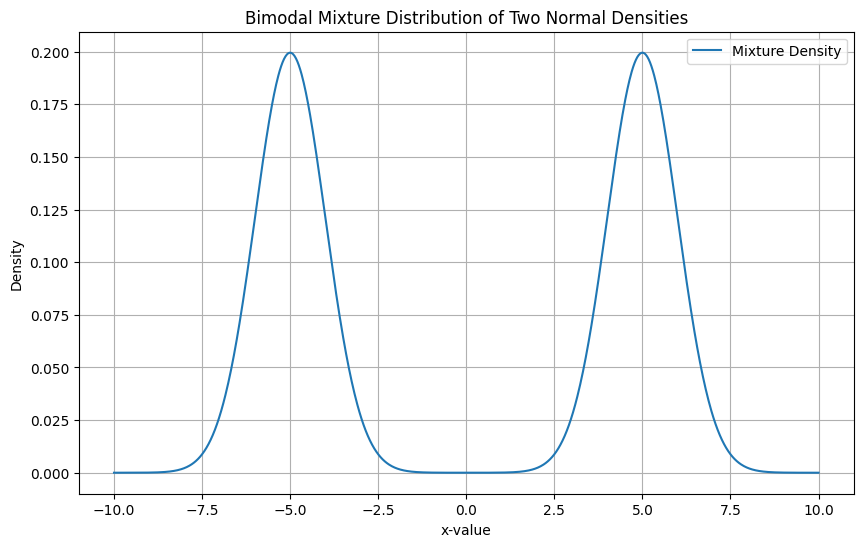

Mean of the mixture (mu12): 0.0
Variance of the mixture (sigma12_squared): 26.0


In [14]:
from scipy.optimize import minimize_scalar
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import matplotlib.pyplot as plt

# Define the parameters
w1 = 1/2
mu1 = -5
mu2 = 5
sigma1 = np.sqrt(1)  # Standard deviation (sqrt of variance)
sigma2 = np.sqrt(1)

# Define the range of x for plotting
x = np.linspace(-10, 10, 1000)

# Calculate the mixture density
px = w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

# Plotting the mixture density
plt.figure(figsize=(10, 6))
plt.plot(x, px, label='Mixture Density')
plt.title('Bimodal Mixture Distribution of Two Normal Densities')
plt.xlabel('x-value')
plt.ylabel('Density')
plt.grid(True)
plt.legend()
plt.show()
mu1 = -5
mu2 = 5
sigma1_squared = 1
sigma2_squared = 1

# Calculate the mean of the mixture
mu12 = w1 * mu1 + (1 - w1) * mu2

# Calculate the variance of the mixture
sigma12_squared = w1 * sigma1_squared + (1 - w1) * sigma2_squared + w1 * (1 - w1) * (mu1 - mu2)**2

print("Mean of the mixture (mu12):", mu12)
print("Variance of the mixture (sigma12_squared):", sigma12_squared)


Part (a): Mean (μ12) = 0.00, Variance (σ12²) = 26.00
Part (b): Mean (μ12) = 5.00, Variance (σ12²) = 1.00
Part (c): Mean (μ12) = -5.00, Variance (σ12²) = 1.00
Part (d): Mean (μ12) = 0.00, Variance (σ12²) = 2.50


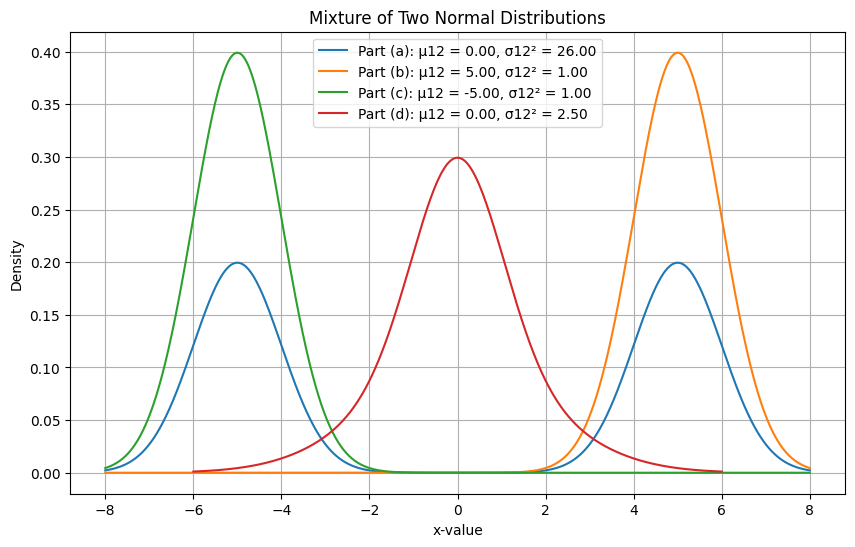

In [15]:


def plot_and_compute_mixture(w1, mu1, mu2, sigma1, sigma2, part_label):
    # Define the range of x for plotting
    x = np.linspace(min(mu1, mu2) - 3*max(sigma1, sigma2), max(mu1, mu2) + 3*max(sigma1, sigma2), 1000)
    
    # Calculate the mixture density
    px = w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)
    
    # Calculate mean and variance
    mu12 = w1 * mu1 + (1 - w1) * mu2
    sigma12_squared = w1 * sigma1**2 + (1 - w1) * sigma2**2 + w1 * (1 - w1) * (mu1 - mu2)**2
    
    # Plotting
    plt.plot(x, px, label=f'{part_label}: μ12 = {mu12:.2f}, σ12² = {sigma12_squared:.2f}')
    
    # Print results
    print(f"{part_label}: Mean (μ12) = {mu12:.2f}, Variance (σ12²) = {sigma12_squared:.2f}")

# Parameters
mu1 = -5
mu2 = 5
sigma1 = 1
sigma2 = 1

plt.figure(figsize=(10, 6))

# Part (a)
plot_and_compute_mixture(0.5, mu1, mu2, sigma1, sigma2, "Part (a)")

# Part (b)
plot_and_compute_mixture(0, mu1, mu2, sigma1, sigma2, "Part (b)")

# Part (c)
plot_and_compute_mixture(1, mu1, mu2, sigma1, sigma2, "Part (c)")

# Part (d)
mu1_d = mu2_d = 0
sigma2_d = 2
plot_and_compute_mixture(0.5, mu1_d, mu2_d, sigma1, sigma2_d, "Part (d)")

# Setup plot
plt.title('Mixture of Two Normal Distributions')
plt.xlabel('x-value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
# PROBLEM 3.3



# Parameters
w1 = 1/3
mu1 = -5
mu2 = 5
sigma1 = 1
sigma2 = 1

# Mixture density function
def mixture_density(x):
    return w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

# Derivative of the mixture density function
def derivative_of_mixture(x):
    h = 1e-5  # small step for numerical derivative
    return (mixture_density(x + h) - mixture_density(x - h)) / (2 * h)

# Find the critical points using numerical optimization
result1 = minimize_scalar(lambda x: -derivative_of_mixture(x), bounds=(-10, 0), method='bounded')
result2 = minimize_scalar(lambda x: -derivative_of_mixture(x), bounds=(0, 10), method='bounded')

print("Critical points where the derivative is zero:")
print(f"x ≈ {result1.x}, at which the density is minimized/maximized")
print(f"x ≈ {result2.x}, at which the density is minimized/maximized")


Critical points where the derivative is zero:
x ≈ -5.999998500182223, at which the density is minimized/maximized
x ≈ 3.99999810811578, at which the density is minimized/maximized


Sample Mean (m12): 5.0487
Sample Variance (s12^2): 0.9055


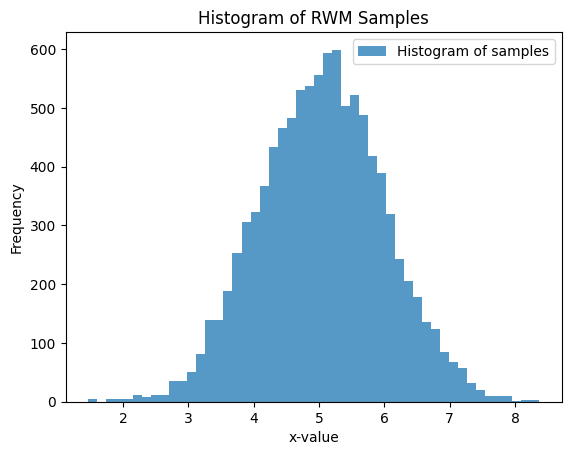

In [26]:




# Parameters
w1 = 1/3
mu1 = -5
mu2 = 5
sigma1 = 1
sigma2 = 1
T = 25000
burn_in = 15000

# Mixture density function
def mixture_density(x):
    return w1 * norm.pdf(x, mu1, sigma1) + (1 - w1) * norm.pdf(x, mu2, sigma2)

# Random Walk Metropolis algorithm
def random_walk_metropolis(T, burn_in):
    samples = np.zeros(T)
    x = random.uniform(-10, 10)  # Initial state
    for t in range(T-1):
        x_new = x + random.uniform(-0.5, 0.5)  # Proposal distribution U[-1/2, 1/2]
        acceptance_ratio = mixture_density(x_new) / mixture_density(x)
        if random.random() < acceptance_ratio:
            x = x_new
        samples[t+1] = x
    return samples[burn_in:]

# Run RWM and get samples
samples = random_walk_metropolis(T, burn_in)

# Extract the last 10,000 samples for analysis
final_samples = samples[-10000:]

# Calculate the sample mean and variance
sample_mean = np.mean(final_samples)
sample_variance = np.var(final_samples)

# Display the calculated sample mean and variance
print(f"Sample Mean (m12): {sample_mean:.4f}")
print(f"Sample Variance (s12^2): {sample_variance:.4f}")

# Plot histogram of the samples
plt.hist(final_samples, bins=50, alpha=0.75, label='Histogram of samples')
plt.title('Histogram of RWM Samples')
plt.xlabel('x-value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

